<a href="https://colab.research.google.com/github/PrecyMaeMwanyungu/Hypothyroidism_prediction/blob/master/_Precy_Mae_Independent_Project_Core_Week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hypothyroid prediction in patients**


---



# **1. Defining the Question**




# **2. Data cleaning and preparation**

## Loading the Dataset

In [258]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [259]:
# Reading our data, top of dataset
df=pd.read_csv("/content/hypothyroid.csv")
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [260]:
# Reading bottom of dataset
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


## **Checking the data**


In [261]:
# Checking the shape of our data
df.shape

(3163, 26)

Our dataset has 26 columns and 3163 entries

In [262]:
# Preview our dataset columns
print ("Our columns are:   "
       ,df.columns)

Our columns are:    Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')


In [263]:
# Taking a look at the statistical summaries
df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [264]:
# Checking our column datatypes
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

All our dataset are written as objects yet some like age should be numeric which we will deal with when we are removing missing values.

## Dealing with missing values

In [265]:
# Checking for non missing values
df.count()

status                       3163
age                          3163
sex                          3163
on_thyroxine                 3163
query_on_thyroxine           3163
on_antithyroid_medication    3163
thyroid_surgery              3163
query_hypothyroid            3163
query_hyperthyroid           3163
pregnant                     3163
sick                         3163
tumor                        3163
lithium                      3163
goitre                       3163
TSH_measured                 3163
TSH                          3163
T3_measured                  3163
T3                           3163
TT4_measured                 3163
TT4                          3163
T4U_measured                 3163
T4U                          3163
FTI_measured                 3163
FTI                          3163
TBG_measured                 3163
TBG                          3163
dtype: int64

It appears that our dataset has no missing values but we will have to confirm that.

In [266]:
# To confirm of no missing values
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

So far, there are no missing values in our dataset. However, I have noticed some question marks in our datasets which could probably be missing values

In [267]:
# Checking for question marks per column using the unique formula
for column in df.columns:
  print('\n')
  print( df[column].nunique())
  print(df[column].unique())



2
['hypothyroid' 'negative']


93
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


3
['M' 'F' '?']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['y' 'n']


240
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' '?' '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17'
 '235' '153' '13' '3

* FTI seems to have a value 612 which is way higher than the rest.

* There is also a question mark (?) in age, gender,TBG and T4u. I will assume that they are null values and replace with mean in numerical columns and mode in categorical columns.


In [268]:
# Replacing our "?" with a null value
df.replace(to_replace='?', inplace=True, value=np.NaN)
print(df.isnull().sum())

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64


In [269]:
#  Filling our null values with mode and mean
cat_columns=['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured', 
       'T4U_measured', 'FTI_measured', 'TBG_measured',]
       # Numerical columns
num_columns= ['age','TSH','T3','TT4','T4U','FTI','TBG'] 
# As seen earlier in our datatypes, we had all our columns as objects so we will convert them to numerical features
df[num_columns] = df[num_columns].apply(pd.to_numeric, errors='coerce',axis=1)

# applying mode on our missing categorical features
for column in cat_columns: 
  df[column]=df[column].fillna(df[column].mode().iloc[0])
# applying mean in our missing numerical features
for column in num_columns:
  df[column]=df[column].fillna(df[column].mean())

In [270]:
# Confirming that there are no missing values left
df.isnull().any()

status                       False
age                          False
sex                          False
on_thyroxine                 False
query_on_thyroxine           False
on_antithyroid_medication    False
thyroid_surgery              False
query_hypothyroid            False
query_hyperthyroid           False
pregnant                     False
sick                         False
tumor                        False
lithium                      False
goitre                       False
TSH_measured                 False
TSH                          False
T3_measured                  False
T3                           False
TT4_measured                 False
TT4                          False
T4U_measured                 False
T4U                          False
FTI_measured                 False
FTI                          False
TBG_measured                 False
TBG                          False
dtype: bool

We are now done removing our missing values

## Dealing with Duplicates





In [271]:
# Displaying duplicated rows
df[df.duplicated()].head(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
53,hypothyroid,69.0,F,f,f,f,f,f,f,f,f,f,f,f,y,21.0,y,0.800000,y,53.0,y,0.86,y,61.0,n,31.283077
66,hypothyroid,62.0,M,f,f,f,f,f,f,f,f,f,f,f,y,100.0,y,0.400000,y,10.0,y,1.00,y,10.0,n,31.283077
124,hypothyroid,77.0,F,f,f,f,f,f,f,f,f,f,f,f,y,23.0,y,0.500000,y,33.0,y,0.67,y,49.0,n,31.283077
128,hypothyroid,79.0,F,f,f,f,f,f,f,f,f,f,f,f,y,29.0,y,1.600000,y,47.0,y,0.97,y,48.0,n,31.283077
131,hypothyroid,50.0,F,t,f,f,f,f,f,f,f,f,f,f,y,34.0,n,1.939749,y,55.0,y,0.93,y,60.0,n,31.283077
132,hypothyroid,85.0,F,f,f,f,f,t,f,f,f,f,f,f,y,7.3,y,2.400000,y,66.0,y,1.09,y,61.0,n,31.283077
135,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,65.0,y,0.700000,y,28.0,y,1.00,y,28.0,n,31.283077
138,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,t,y,35.0,y,2.000000,y,19.0,y,0.95,y,20.0,n,31.283077
145,hypothyroid,60.0,F,f,f,f,f,f,f,f,f,f,f,t,y,12.0,y,2.200000,y,71.0,y,1.40,y,51.0,n,31.283077
146,hypothyroid,78.0,F,f,f,f,f,f,f,f,f,f,f,f,y,28.0,y,0.200000,y,17.0,y,1.01,y,16.0,n,31.283077


In [272]:
# Checking for number of duplicated rows
print("Our dataset has ,",len(df[df.duplicated()]),"duplicated rows.")

Our dataset has , 77 duplicated rows.


We will have to drop our duplicates in order to ensure improved accuracy of our models.

In [273]:
# Drop duplicates
df.drop_duplicates(inplace=True)

## Outliers

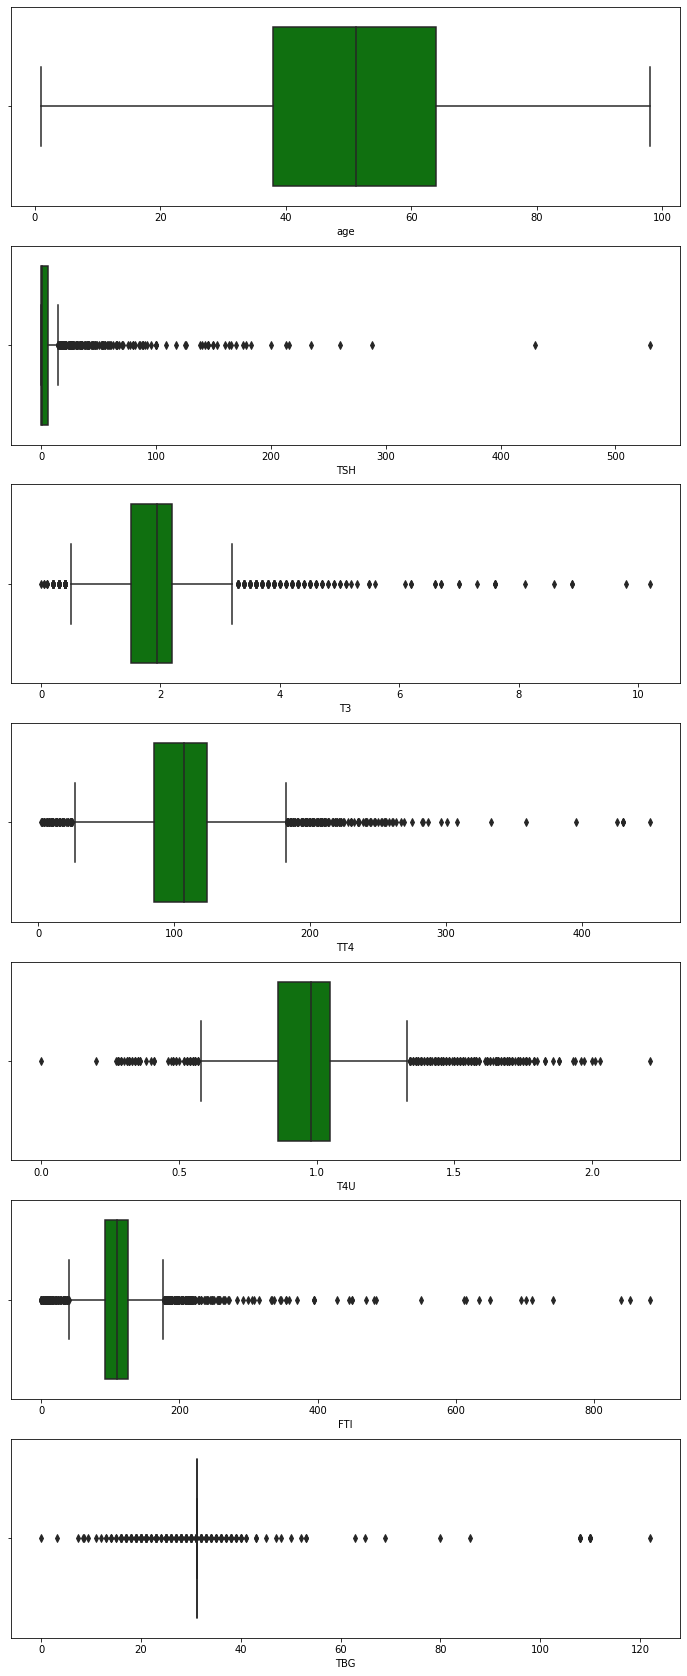

In [274]:
# Checking for outliers using boxplots
fig, ((ax1),(ax2), (ax3),(ax4),(ax5),(ax6),(ax7)) = plt.subplots(7 ,figsize=(12, 30))
#fig.suptitle('Boxplots')
print('\n')
sns.boxplot(df['age'], ax=ax1, color='green')
sns.boxplot(df['TSH'], ax=ax2, color='green')
sns.boxplot(df['T3'], ax=ax3, color='green')
sns.boxplot(df['TT4'], ax=ax4, color='green')
sns.boxplot(df['T4U'], ax=ax5, color='green')
sns.boxplot(df['FTI'], ax=ax6, color='green')
sns.boxplot(df['TBG'], ax=ax7, color='green')

plt.show()

# **3. Perform EDA**

## Univariate

In [275]:
# Showing the number of people with and without hypothyroidism
df['status'].value_counts()

negative       2945
hypothyroid     141
Name: status, dtype: int64

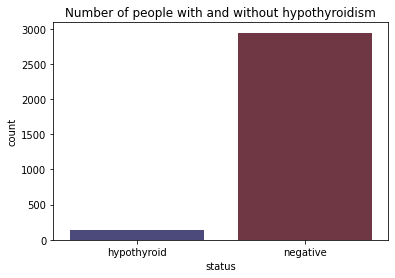

<Figure size 432x288 with 0 Axes>

In [276]:
# Visualizing the result above
sns.countplot(x='status',data=df,palette='icefire')
plt.title('Number of people with and without hypothyroidism')
plt.show()
plt.savefig('countplot')

There are more people with hypothyroidsm recorded than those without.

## Bivariate

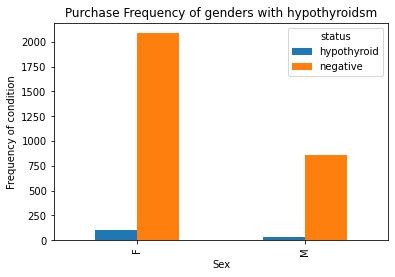

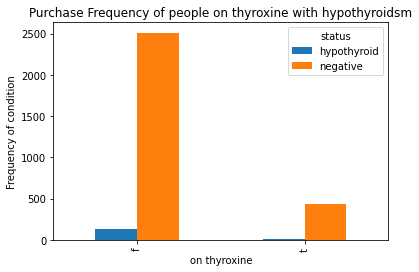

In [278]:
# Frequency of genders with hypothyroidsm
%matplotlib inline
pd.crosstab(df.sex,df.status).plot(kind='bar')
plt.title('Purchase Frequency of genders with hypothyroidsm')
plt.xlabel('Sex')
plt.ylabel('Frequency of condition')
plt.savefig('frequency of condition amoung genders')

#
pd.crosstab(df.on_thyroxine,df.status).plot(kind='bar')
plt.title('Purchase Frequency of people on thyroxine with hypothyroidsm')
plt.xlabel('on thyroxine')
plt.ylabel('Frequency of condition')
plt.savefig('frequency of condition amoung occurrance')

From the graph above, there are more females with hyperthyroidsm than males

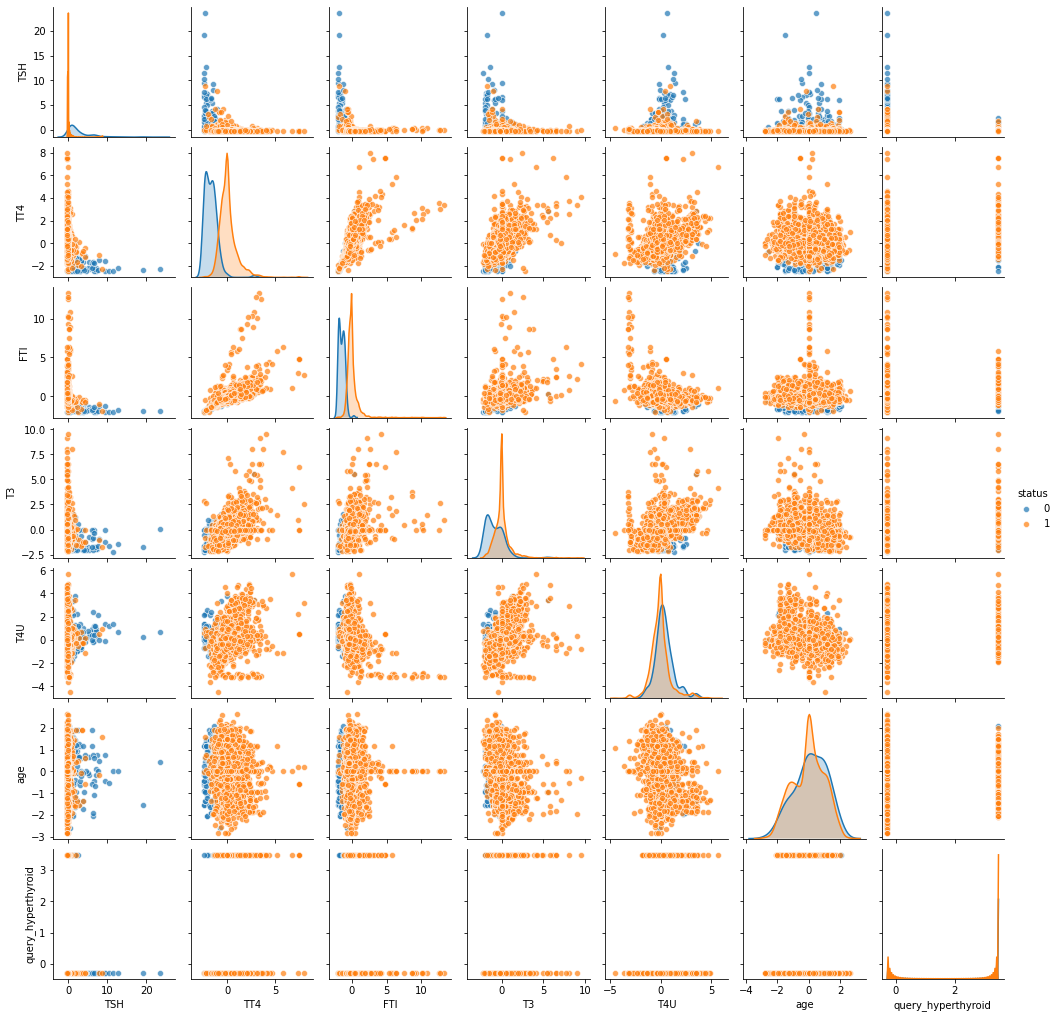

In [294]:
# Make the pair plot Showing distribution of those with and without hyperthyroid
sns.pairplot(df, hue = 'status', diag_kind = 'kde', plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True),size=2)

# **4. Splitting our dataset**

Label Encoding

In [279]:
# Applying label encoding to our categorical features to ensure they are in binary form
cat_columns=['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured', 
       'T4U_measured', 'FTI_measured', 'TBG_measured',]
# Import label encoder
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for column in cat_columns:
  lbl_encoders[column]=LabelEncoder()
  df[column]= lbl_encoders[column].fit_transform(df[column])

In [280]:
# Confirming that our label encoding has taken place
df.head(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,31.283077
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,31.283077
2,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,31.283077


* As shown above, our label encoding has taken place and for example our sex= 1 means that it is a male, for the boolean represented columns, 0=False and 1=True

Standardizing the data

In [281]:
# We will standardize our features because they were measured in different units
from sklearn.preprocessing import StandardScaler
StandardScaler= StandardScaler()
columns_to_scale=['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']
df[columns_to_scale]=StandardScaler.fit_transform(df[columns_to_scale])
df.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,0,1.169733,1.565855,-0.411022,-0.134706,-0.117463,-0.18582,-0.287101,-0.287101,-0.142005,-0.180145,-0.114595,-0.025466,-0.179184,0.415858,1.090022,0.531627,-1.543913,0.290394,-2.188163,0.289738,2.316896,0.28908,-1.825846,-0.29755,0.003133
1,0,-2.023268,-0.638629,2.432958,-0.134706,-0.117463,-0.18582,-0.287101,-0.287101,-0.142005,-0.180145,-0.114595,-0.025466,-0.179184,0.415858,6.275472,0.531627,-0.271781,0.290394,-2.094770,0.289738,0.702789,0.28908,-1.704679,-0.29755,0.003133


As shown above, our dataset is already scaled, we can now select featues to use our dataset.

Feature selection

In [282]:
# Selecting the most important features
a= df.loc[:, df.columns != 'status'] # Independent variables

b= df.iloc[:, df.columns == 'status'] # Dependent variable
from sklearn.ensemble import ExtraTreesRegressor
# Initialize
model=ExtraTreesRegressor()
model.fit(a,b)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [283]:
# Showing the feature importance rates
print(model.feature_importances_)

[2.62683619e-02 8.56770995e-03 1.49710717e-02 2.94966194e-05
 1.17368265e-02 1.01488583e-02 1.85207674e-02 1.77249544e-03
 3.92552105e-04 3.77487482e-03 6.87834154e-05 0.00000000e+00
 4.87123739e-03 1.45415372e-02 3.20400032e-01 1.91532560e-03
 4.14215227e-02 0.00000000e+00 2.44106616e-01 0.00000000e+00
 3.42532404e-02 0.00000000e+00 2.41490801e-01 5.54929681e-04
 1.92960753e-04]


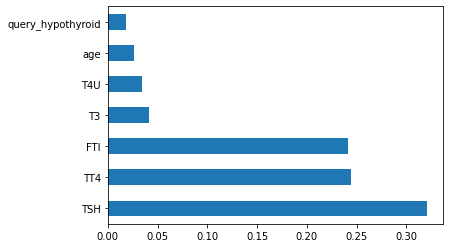

In [284]:
# To plot graph of the top ten features that influence hypotyroidsm
feat_importances= pd.Series(model.feature_importances_, index= x.columns)
# You can take the top five important features
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

The above shows the most important features affecting hypotyroidsm.

In [286]:
# Selecting the features above
cols=['TSH','TT4','FTI','T3','T4U','age','query_hyperthyroid','status']
df=df[cols]

Train test split

In [287]:
# Separating dependent and independent variables
X= df.loc[:, df.columns != 'status'] # Independent variables

y= df.iloc[:, df.columns == 'status'] # Dependent variable

In [288]:
#  Split the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("Y_test shape is:",y_test.shape,
      "X_test shape is:",X_test.shape,
      "Y_train shape is:",y_train.shape,
      "X_train shape is:",X_train.shape)

Y_test shape is: (618, 1) X_test shape is: (618, 7) Y_train shape is: (2468, 1) X_train shape is: (2468, 7)


Our train shapes and test shapes are equal so we are done splitting our dataset.

# **5. Decision Trees and Support Vector Machines**


## Base Model (Logistic Regression)


---
We will use logistic regression as our base model as the instructions recquire us not to use decision trees.


Logistic Regression Assumptions

---

* We will assume that our dependent variable is binary.
* Only the meaningful variables have been included.
* The independent variables are independent of each other with  little or no multicollinearity.
* The independent variables are linearly related to the log odds.
* Our logistic regression has a large sample size.

In [289]:
# Fitting our model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [290]:
# Predicting test results and calculating our accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


In [320]:
# Our Accuracies
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.016198704103671708
Mean Squared Error: 0.016198704103671708
Root Mean Squared Error: 0.12727412975020377


Our base model has an accuracy of 98% . Which is really high and could cause overfitting.

In [291]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 28  11]
 [  3 884]]


The result is telling us that we have 28 + 884 correct predictions and 3+ 11 incorrect predictions.

## Part 1: Decision trees:

### Random Forest

In [297]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_predic=clf.predict(X_test)

In [298]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predic))

Accuracy: 0.990280777537797


In [319]:
# Our Accuracies
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predic))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predic))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predic)))

Mean Absolute Error: 0.009719222462203024
Mean Squared Error: 0.009719222462203024
Root Mean Squared Error: 0.09858611698511624


Using Random forest classifier has improved our base model to 99%

In [299]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predic)
print(confusion_matrix)

[[ 35   4]
 [  5 882]]


This means there are 35+ 882 cporrectly predicted values and 5+4 incorrectly predivted values.

### Adaboost

In [304]:
# Fitting adaboost to our model
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))

Accuracy: 0.9838012958963283


In [318]:
# Our Accuracies
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

Mean Absolute Error: 0.016198704103671708
Mean Squared Error: 0.016198704103671708
Root Mean Squared Error: 0.12727412975020377


In [305]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predicted)
print(confusion_matrix)

[[ 32   7]
 [  8 879]]


Our adaboost has performed slightly poorer than the base model, this is good news because it means the model does not perfectly fit our test dataset.

### Gradient boosting

In [308]:
# Step 6: Fit a Gradient Boosting model, " compared to "Decision Tree model, accuracy go up by 10%
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_p = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_p))

Accuracy: 0.9935205183585313


In [317]:
# Our Accuracies
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_p))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_p))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_p)))

Mean Absolute Error: 0.0064794816414686825
Mean Squared Error: 0.0064794816414686825
Root Mean Squared Error: 0.08049522744528823


Gradient boosting has improved the model to 99% which is higher than our base model yet we would want to reduce our model below 98 to reduce overfitting

## Part 2: SVM



### Linear Kernel

In [311]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [313]:
y_predicts = svclassifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predicts))

Accuracy: 0.9870410367170627


In [315]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predicts)
print(confusion_matrix)

[[ 30   9]
 [  3 884]]


In [316]:
# Our Accuracies
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicts))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicts))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicts)))

Mean Absolute Error: 0.012958963282937365
Mean Squared Error: 0.012958963282937365
Root Mean Squared Error: 0.11383744235943359


### Polynomial kernel

In [321]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [322]:
y_poly = svclassifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_poly))

Accuracy: 0.9719222462203023


In [323]:
# Our Accuracies
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_poly))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_poly))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_poly)))

Mean Absolute Error: 0.028077753779697623
Mean Squared Error: 0.028077753779697623
Root Mean Squared Error: 0.16756417809214957


### rbf/ Gaussian kernel

In [324]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [325]:
y_rbf = svclassifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_rbf))

Accuracy: 0.9859611231101512


In [326]:
# Our Accuracies
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_rbf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_rbf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_rbf)))

Mean Absolute Error: 0.014038876889848811
Mean Squared Error: 0.014038876889848811
Root Mean Squared Error: 0.1184857666129093


# **6. Conclusion**

# 7. Challenging the solution